# **[Movie Dataset](https://drive.google.com/file/d/1_ed-D9jaIFUimurItNV1nSmb39sBxZ4s/view)** :

## [Credit Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data = pd.read_csv(r"/content/movies.csv")
data = pd.read_csv(r'/content/movie_metadata.csv')

In [ ]:
print(data.shape)
print(data.columns)
data.head()

(5043, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


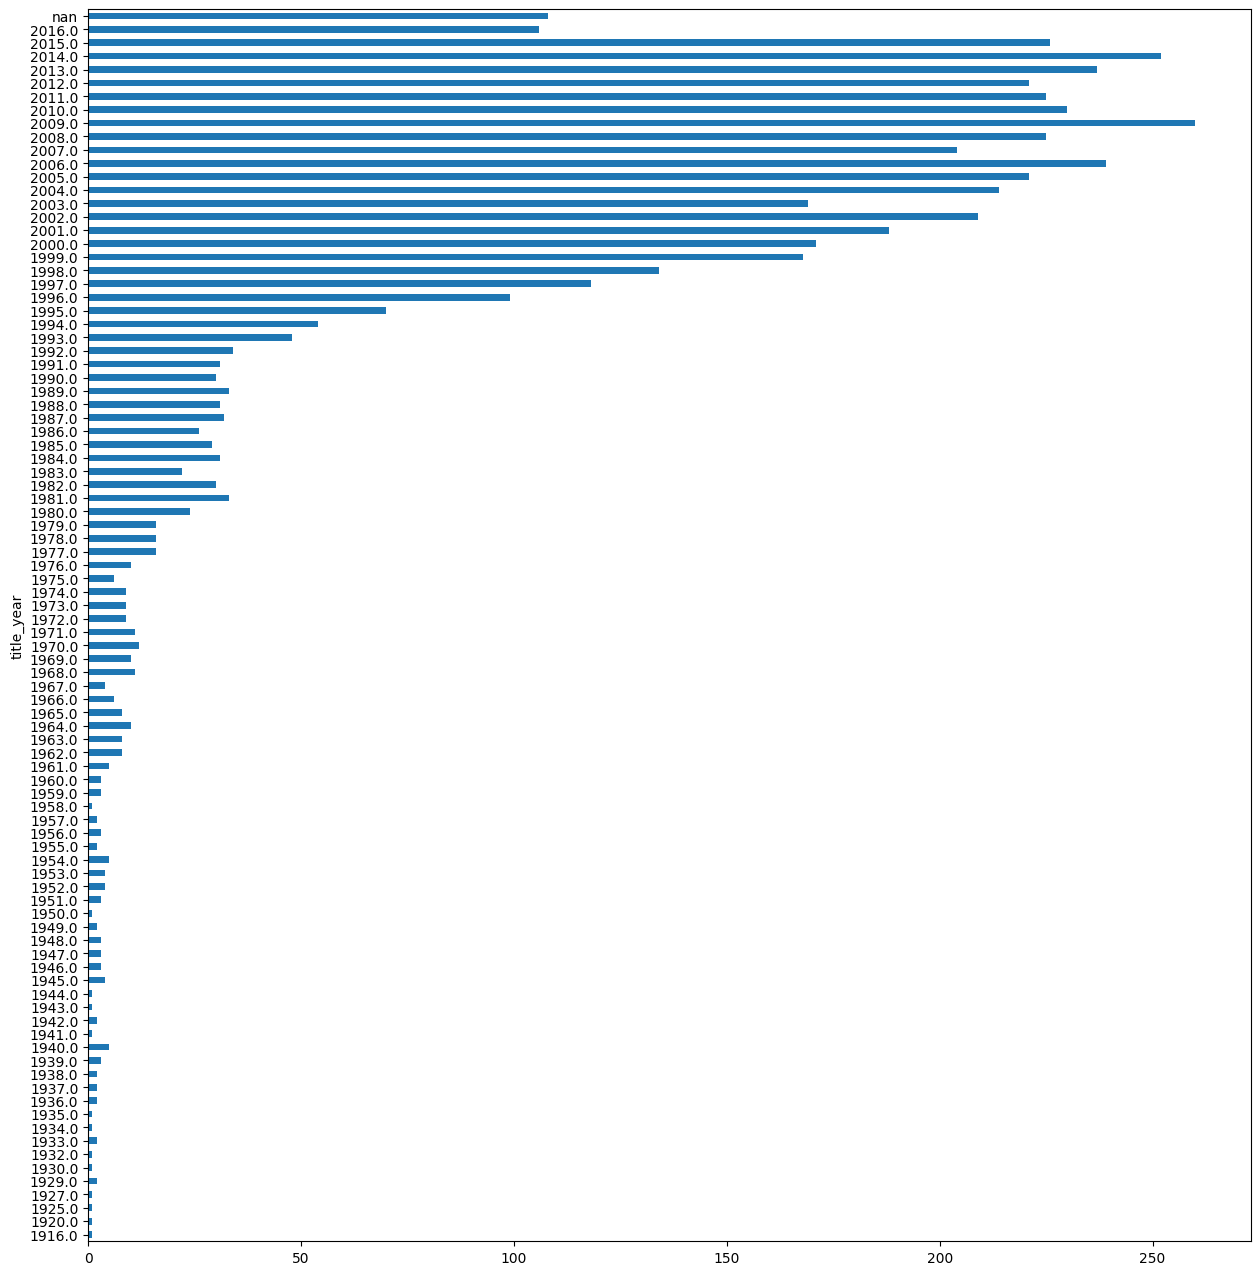

In [ ]:
#visualize movies year wise
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [ ]:
# recommendation on the basis of these columns only : It can be alter as per requirements
data1 = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','imdb_score']]

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,imdb_score
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,6.8
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,8.5
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,7.1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   director_name  4939 non-null   object 
 1   actor_1_name   5036 non-null   object 
 2   actor_2_name   5030 non-null   object 
 3   actor_3_name   5020 non-null   object 
 4   genres         5043 non-null   object 
 5   movie_title    5043 non-null   object 
 6   imdb_score     5043 non-null   float64
dtypes: float64(1), object(6)
memory usage: 275.9+ KB


In [ ]:
data1.isnull().sum()

,0
director_name,104
actor_1_name,7
actor_2_name,13
actor_3_name,23
genres,0
movie_title,0
imdb_score,0


In [ ]:
# Re-placing NaN values with 'unknown' only for object dtype columns beacuse python won't treat 'unknown' as null values
for col in data1.columns:
  if data1[col].dtype == 'object':
    data1[col] = data[col].replace(np.nan,'unknown')

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,imdb_score
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,6.8
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,8.5
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,7.1


In [ ]:
data1.isnull().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
imdb_score,0


In [ ]:
# replacing '|' character from genres column
data1['genres'] = data1['genres'].str.replace('|',' ')

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,imdb_score
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar,7.9
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End,7.1
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre,6.8
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises,8.5
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,7.1


In [ ]:
# Changing the entire dataframe to lower casing
for col in data1.columns:
  if data1[col].dtype == 'object':
    data1[col] = data1[col].str.lower()

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,imdb_score
0,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci-fi,avatar,7.9
1,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean: at world's end,7.1
2,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,6.8
3,christopher nolan,tom hardy,christian bale,joseph gordon-levitt,action thriller,the dark knight rises,8.5
4,doug walker,doug walker,rob walker,unknown,documentary,star wars: episode vii - the force awakens ...,7.1


In [ ]:
data1['movie_title'][8]

'avengers: age of ultron\xa0'

In [ ]:
# null terminating character at the end
# data1['movie_title'] = data1['movie_title'].str[:-1]
data1['movie_title'] = data1['movie_title'].apply(lambda x : x[:-1])

In [ ]:
data1['movie_title'][8]

'avengers: age of ultron'

In [ ]:
#data saved offline
data1.to_csv('formatted_data.csv',index=False)

In [ ]:
cred = pd.read_csv(r'/content/credits.csv',engine="python")

In [ ]:
cred.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
meta = pd.read_csv(r'/content/movies_metadata.csv')

ParserError: Error tokenizing data. C error: Expected 24 fields in line 2630, saw 27


In [ ]:
meta.info()

In [ ]:
meta.head()

In [ ]:
# converting release date column to datetime format
# 'coerce' : impute parsing error with NaN , 'raise' : raises an exception in case of parsing error,'ignore': ignore the parsing error entirely
meta['release_date']= pd.to_datetime(meta['release_date'],errors='coerce')

In [ ]:
meta.info()

In [ ]:
# adding extra column with release year
meta['year'] = meta['release_date'].dt.year

In [ ]:
meta['year'].value_counts().sort_index()

In [ ]:
meta.rename(columns = {'vote_average':'imdb_score'},inplace=True)

In [ ]:
meta.columns

In [ ]:
# Getting 2017 data from this file
new_meta = meta.loc[meta.year == 2017,['genres','id','imdb_score','title','year']]

In [ ]:
new_meta.head()

In [ ]:
# converting id to interger
new_meta['id'] = new_meta['id'].astype(int)

In [ ]:
new_meta.dtypes

In [ ]:
data2 = pd.merge(new_meta,cred,on='id')

In [ ]:
data2.head()

In [ ]:
pd.set_option('display.max_colwidth',75)
data2.head()

In [ ]:
# we will convert literals column 'genres','cast','crew' columns into a list. ast.literal_eval() will convert literals into strings
import ast
data2['genres'] = data2['genres'].map(lambda x: ast.literal_eval(x))
data2['cast'] = data2['cast'].map(lambda x: ast.literal_eval(x))
data2['crew'] = data2['crew'].map(lambda x: ast.literal_eval(x))

In [ ]:
pd.set_option('display.max_colwidth',75)
data2

In [ ]:
# data2['cast'][0]

In [ ]:
def Make_GenresList(x):
  gen = []
  st = " "
  for i in x:
    if i.get('name') == 'Science Fiction':
      scifi = 'Sci-Fi'
      gen.append(scifi)
    else:
      gen.append(i.get('name'))
  if gen == []:
    return np.NaN
  else:
    return (st.join(gen))

In [ ]:
data2['genres'] = data2['genres'].map(lambda x: Make_GenresList(x))

In [ ]:
data2['genres'].head()

In [ ]:
# def get_actor1(x):
#   casts = []
#   for i in x:
#     casts.append(i.get('name'))
#   if casts == []:
#     return np.NaN
#   else:
#     return (casts[0])

In [ ]:
# data2['actor_1_name'] = data2['cast'].map(lambda x: get_actor1(x))

In [ ]:
# data2['actor_1_name'].head()

In [ ]:
# def get_actor2(x):
#   casts = []
#   for i in x:
#     casts.append(i.get('name'))
#   if casts == [] or len(casts)<=1:
#     return np.NaN
#   else:
#     return (casts[1])

In [ ]:
# data2['actor_2_name'] = data2['cast'].map(lambda x: get_actor2(x))

In [ ]:
# data2['actor_2_name'].head()

In [ ]:
def get_top_actors(cast_list, rank):
    if not isinstance(cast_list, list):  # Ensure it's a list
        return None

    # Sort cast by 'order' (ascending, since lower 'order' means higher priority)
    sorted_cast = sorted(cast_list, key=lambda x: x.get('order', float('inf')))

    # Extract actor name based on rank (1-based index)
    return sorted_cast[rank - 1]['name'] if len(sorted_cast) >= rank else None

# Assign top 3 actors
data2['actor_1_name'] = data2['cast'].map(lambda x: get_top_actors(x, 1))
data2['actor_2_name'] = data2['cast'].map(lambda x: get_top_actors(x, 2))
data2['actor_3_name'] = data2['cast'].map(lambda x: get_top_actors(x, 3))

In [ ]:
# def get_actor3(x):
#   casts = []
#   for i in x:
#     casts.append(i.get('name'))
#     if casts == [] or len(casts)<=2:
#       return np.NaN
#     else:
#       return (casts[2])

In [ ]:
# data2['actor_3_name'] = data2['cast'].map(lambda x: get_actor3(x))

In [ ]:
data2['actor_3_name']

In [ ]:
data2.head()

In [ ]:
# def get_directors(x):
#   dt = []
#   st = " "
#   for i in x:
#     if i.get('job') == 'Director':
#       dt.append(i.get('name'))
#   if dt == []:
#     return np

def get_directors(crew_list):
    if not isinstance(crew_list, list):  # Handle cases where data is missing or not a list
        return None

    directors = [person['name'] for person in crew_list if person.get('job') == 'Director']

    return directors[0] if directors else None  # Return None if no directors found

# Assuming data2 is a pandas DataFrame
data2['director_name'] = data2['crew'].map(get_directors)

In [ ]:
# data2['director_name'] = data2['crew'].map(lambda x: get_directors(x))

In [ ]:
# print(data2['crew'].apply(lambda x: any(d.get('job') == 'Director' for d in x) if isinstance(x, list) else False).sum())


In [ ]:
# data2['director_name']

In [ ]:
data2.columns

In [ ]:
# only selecting prepared data
movie = data2.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','title','imdb_score']]


In [ ]:
movie.head()

In [ ]:
movie.isnull().sum()

In [ ]:
movie = movie.dropna(how='any')

In [ ]:
movie.isnull().sum()

In [ ]:
movie.columns

In [ ]:
#rename column names {'old_name':'new_name'}
movie.rename(columns={'genres':'genres_list','title':'movie_title'},inplace=True)

In [ ]:
# Changing the entire dataframe to lower casing
for col in movie.columns:
  if movie[col].dtype == 'object':
    movie[col] = movie[col].str.lower()

In [ ]:
movie.head()

In [ ]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres_list']

In [ ]:
movie.head()

In [ ]:
old = pd.read_csv(r'/content/formatted_data.csv')
old.head()

In [ ]:
old.rename(columns={'genres':'genres_list'},inplace=True)

In [ ]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres_list']

In [ ]:
old.head()

In [ ]:
dataset = pd.concat([old, movie], ignore_index=True)

In [ ]:
print(dataset.shape)
dataset.head()

In [ ]:
dataset.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [ ]:
print(dataset.shape)
dataset.head()

# 2018 Movies

In [ ]:
dataset.to_csv('orig_movie_dataset',index=False)

In [ ]:
# fetching data from wikipedia website for 2018 year
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df1.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6]


In [ ]:
df = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [ ]:
print(df.shape)
df.head()

(249, 6)


,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6]


In [ ]:
!pip install tmdbv3api

In [ ]:
# b87b3de8a4ad695593e0450d375cf635

In [ ]:
from tmdbv3api import TMDb
import json
import requests


In [ ]:

tmdb = TMDb
tmdb.api_key='b87b3de8a4ad695593e0450d375cf635'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x): #pass in the title of the movies
    genres = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #we will match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #we will get the result from the IMDb data
    data_json = response.json() #we will then convert it to a json file
    if data_json['genres']: #in the json file we will only need to extract the "genre"
        genre_str = " "
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name']) #we will then add the "genre" to the empty genre list we created above
        return genre_str.join(genres)
    else:
        np.NaN # we will return the results but if we don't find anything we will consider it as a missing value


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))


In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],Horror Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3],Thriller Drama
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6],Action Crime Thriller
...,...,...,...,...,...,...,...
244,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine...",[238],Romance Comedy
245,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions /...,Etan Cohen (director/screenplay); Will Ferrell...,[142],Comedy Mystery Crime
246,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[117],Comedy Drama
247,D E C E M B E R,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[207],Drama History


In [ ]:
df_2018 = df[['Title','Cast and crew','genres']]

In [ ]:
df_2018.head()

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Crime Thriller


In [ ]:
def get_director(x):
    if " (director)" in x: #we are getting "director"
        return x.split(" (director)")[0]
    elif " (directors)" in x: #we are getting "directors" with "s"
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0] #we are getting "directors/screenplay"

In [ ]:

#let's apply the above function on the "Cast and crew" column
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


<ipython-input-104-e4fd6ee00db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff (director/screenplay); La...
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Crime Thriller,Brett Donowho
...,...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine...",Romance Comedy,Peter Segal
245,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Comedy Mystery Crime,Etan Cohen
246,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama,Adam McKay
247,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder


In [ ]:
# get actor 1 name
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

# get actor 2 name

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

# get actor 3 name

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


<ipython-input-107-40d82abe80b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
<ipython-input-107-40d82abe80b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff (director/screenplay); La...,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
245,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Comedy Mystery Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
246,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama,Adam McKay,Christian Bale,Amy Adams,Steve Carell
247,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [ ]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})


In [ ]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); La...,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,Acts of Violence
...,...,...,...,...,...,...
244,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,Second Act
245,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Comedy Mystery Crime,Holmes & Watson
246,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Comedy Drama,Vice
247,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex


In [ ]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
# Changing the entire dataframe to lower casing
for col in new_df18.columns:
  if new_df18[col].dtype == 'object':
    new_df18[col] = new_df18[col].str.lower()

In [ ]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,adam robitel,lin shaye,angus sampson,leigh whannell,horror thriller,insidious: the last key,lin shaye angus sampson leigh whannell adam ro...
1,christopher radcliff (director/screenplay); la...,lauren wolkstein (director); alex pettyfer,james freedson-jackson,emily althaus,thriller drama,the strange ones,lauren wolkstein (director); alex pettyfer jam...
2,jaume collet-serra,liam neeson,vera farmiga,patrick wilson,action thriller mystery,the commuter,liam neeson vera farmiga patrick wilson jaume ...
3,babak najafi,taraji p. henson,jahi di'allo winston,billy brown,thriller action crime,proud mary,taraji p. henson jahi di'allo winston billy br...
4,brett donowho,bruce willis,cole hauser,shawn ashmore,action crime thriller,acts of violence,bruce willis cole hauser shawn ashmore brett d...
...,...,...,...,...,...,...,...
244,peter segal,jennifer lopez,leah remini,vanessa hudgens,romance comedy,second act,jennifer lopez leah remini vanessa hudgens pet...
245,etan cohen,will ferrell,john c. reilly,rebecca hall,comedy mystery crime,holmes & watson,will ferrell john c. reilly rebecca hall etan ...
246,adam mckay,christian bale,amy adams,steve carell,comedy drama,vice,christian bale amy adams steve carell adam mck...
247,mimi leder,felicity jones,armie hammer,justin theroux,drama history,on the basis of sex,felicity jones armie hammer justin theroux mim...


# 2019 Movies

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df0 = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [ ]:
df0.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))


In [ ]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Crime Thriller
...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine...",Romance Comedy
245,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Comedy Mystery Crime
246,Vice,Adam McKay (director/screenplay); Christian Ba...,Comedy Drama
247,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))


<ipython-input-121-b9445bd940c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))
<ipython-input-121-b9445bd940c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))
<ipython-input-121-b9445bd940c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})


In [ ]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
# Changing the entire dataframe to lower casing
for col in new_df19.columns:
  if new_df19[col].dtype == 'object':
    new_df19[col] = new_df19[col].str.lower()

In [ ]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']


In [ ]:
new_df19.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,adam robitel,lin shaye,angus sampson,leigh whannell,horror thriller,insidious: the last key,lin shaye angus sampson leigh whannell adam ro...
1,christopher radcliff (director/screenplay); la...,lauren wolkstein (director); alex pettyfer,james freedson-jackson,emily althaus,thriller drama,the strange ones,lauren wolkstein (director); alex pettyfer jam...
2,jaume collet-serra,liam neeson,vera farmiga,patrick wilson,action thriller mystery,the commuter,liam neeson vera farmiga patrick wilson jaume ...
3,babak najafi,taraji p. henson,jahi di'allo winston,billy brown,thriller action crime,proud mary,taraji p. henson jahi di'allo winston billy br...
4,brett donowho,bruce willis,cole hauser,shawn ashmore,action crime thriller,acts of violence,bruce willis cole hauser shawn ashmore brett d...


In [ ]:
my_18_19_df = pd.concat([new_df19,new_df19],ignore_index=True)

In [ ]:
my_18_19_df.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title', 'comb'],
      dtype='object')

In [ ]:
old = pd.read_csv(r'/content/formatted_data.csv')
old.head()

In [ ]:
final_df = pd.concat([old,my_18_19_df],ignore_index=True)

In [ ]:
final_df

In [ ]:
final_df.isna().sum()
final_df = final_df.dropna(how='any')

In [ ]:
final_df.isna().sum()

In [ ]:
final_df.to_csv('all_movie.csv',index=False)

# 2020 Movies

In [ ]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')


In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')


In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [ ]:
df01 = pd.concat([df1,df2,df3,df4],ignore_index=True)
df01.head()

In [ ]:
df_2020 = df[['Title','Cast and crew']]


In [ ]:
#using above crerated function to get genres
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2020

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_2020.head()

In [ ]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})


In [ ]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df20.head()

In [ ]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']


In [ ]:
new_df20.isna().sum()

In [ ]:
new_df20 = new_df20.dropna(how='any')

In [ ]:
new_df20.isna().sum()

In [ ]:
# Changing the entire dataframe to lower casing
for col in new_df20.columns:
  if new_df20[col].dtype == 'object':
    new_df20[col] = new_df20[col].str.lower()

In [ ]:
all_df = pd.concat([final_df,new_df20],ignore_index=True)

In [ ]:
all_df.head()

In [ ]:
all_df.to_csv('final_all_movies.csv',index=False)

# 2021 MOVIES

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')


In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')


In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [ ]:
df2021 = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [ ]:
df2021.head()

In [ ]:
df_2021 = df[['Title','Cast and crew']]

In [ ]:
df_2021

In [ ]:
df_2021['genres'] = df_2021['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2021

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2021['director_name'] = df_2021['Cast and crew'].map(lambda x: get_director(str(x)))
df_2021['actor_1_name'] = df_2021['Cast and crew'].map(lambda x: get_actor1(str(x)))
df_2021['actor_2_name'] = df_2021['Cast and crew'].map(lambda x: get_actor2(str(x)))
df_2021['actor_3_name'] = df_2021['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_2021.head()

In [ ]:
df_2021 = df_2021.rename(columns={'Title':'movie_title'})


In [ ]:
new_df21 = df_2021.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df21['comb'] = new_df21['actor_1_name'] + ' ' + new_df21['actor_2_name'] + ' '+ new_df21['actor_3_name'] + ' '+ new_df21['director_name'] +' ' + new_df21['genres']


In [ ]:
new_df21.isna().sum()

In [ ]:
new_df21.dropna(how='any',inplace=True)

In [ ]:
new_df21.isna().sum()

In [ ]:
# Changing the entire dataframe to lower casing
for col in new_df21.columns:
  if new_df21[col].dtype == 'object':
    new_df21[col] = new_df21[col].str.lower()

In [ ]:
new_df21.head()

In [ ]:
# all = pd.read_csv(r'/content/final_data.csv')

In [ ]:
# all

In [ ]:
all_main = pd.read_csv(r'/content/main_data.csv')

In [ ]:
all_main

In [ ]:
till_21 = pd.concat([all_main,new_df21],ignore_index=True)

In [ ]:
till_21

In [ ]:
till_21.to_csv('till_2021.csv',index=False)

In [ ]:
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup

def extract_movie_tables(url):
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source, 'lxml')
    tables = soup.find_all('table', class_='wikitable sortable')

    movie_dfs = []
    for table in tables:
        try:
            df = pd.read_html(str(table))[0]
            movie_dfs.append(df)
        except ValueError:
            continue  # Skip tables that cause errors

    return movie_dfs

def process_multiple_urls(urls):
    all_movies = []
    for url in urls:
        movie_dfs = extract_movie_tables(url)
        all_movies.extend(movie_dfs)

    return pd.concat(all_movies, ignore_index=True)

# Example usage
urls = [
    "https://en.wikipedia.org/wiki/List_of_American_films_of_2022",
    "https://en.wikipedia.org/wiki/List_of_American_films_of_2023",
    "https://en.wikipedia.org/wiki/List_of_American_films_of_2024",
    "https://en.wikipedia.org/wiki/List_of_American_films_of_2025"
]



In [ ]:
final_df_2125 = process_multiple_urls(urls)
final_df_2125.head()


In [ ]:
df_21_25 = final_df_2125[['Title','Cast and crew']]


In [ ]:
df_21_25.info()

In [ ]:
import requests
import numpy as np
from tmdbv3api import Movie, TMDb

# Initialize TMDb API
tmdb = TMDb()
tmdb.api_key='b87b3de8a4ad695593e0450d375cf635'
tmdb_movie = Movie()


In [ ]:
def get_genre(x):
    try:
        genres = []
        result = tmdb_movie.search(x)

        if not result:
            return np.NaN  # If no result is found, return NaN

        movie_id = result[0].id
        url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}'
        response = requests.get(url)

        if response.status_code != 200:
            print(f"⚠️ API Error for '{x}': {response.status_code}")
            return np.NaN

        data_json = response.json()

        # Ensure 'genres' key exists and is a list
        if 'genres' in data_json and isinstance(data_json['genres'], list):
            genres = [genre['name'] for genre in data_json['genres']]
            return " ".join(genres)

        return np.NaN  # Return NaN if 'genres' key is missing

    except Exception as e:
        print(f"❌ Error processing '{x}': {e}")
        return np.NaN  # Return NaN if any unexpected error occurs




In [ ]:
# ✅ Apply the function safely to your DataFrame
df_21_25['genres'] = df_21_25['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_21_25['director_name'] = df_21_25['Cast and crew'].map(lambda x: get_director(str(x)))
df_21_25['actor_1_name'] = df_21_25['Cast and crew'].map(lambda x: get_actor1(str(x)))
df_21_25['actor_2_name'] = df_21_25['Cast and crew'].map(lambda x: get_actor2(str(x)))
df_21_25['actor_3_name'] = df_21_25['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_21_25

In [ ]:
df_21_25 = df_21_25.rename(columns={'Title':'movie_title'})


In [ ]:
new_df_21_25 = df_21_25.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df_21_25

In [ ]:
new_df_21_25['comb'] = new_df_21_25['actor_1_name'] + ' ' + new_df_21_25['actor_2_name'] + ' '+ new_df_21_25['actor_3_name'] + ' '+ new_df_21_25['director_name'] +' ' + new_df_21_25['genres']


In [ ]:
new_df_21_25

In [ ]:
new_df_21_25.isnull().sum()

In [ ]:
new_df_21_25.dropna(how='any',inplace=True)

In [ ]:
new_df_21_25.isnull().sum()

In [ ]:
for col in new_df_21_25.columns:
  if new_df_21_25[col].dtype == 'object':
    new_df_21_25[col] = new_df_21_25[col].str.lower()


In [ ]:
new_df_21_25

In [ ]:
till_21 #last df till 2021 from earlier

In [ ]:
till25 = pd.concat([till_21,new_df_21_25],ignore_index=True)

In [ ]:
till25.columns

In [ ]:
till25.to_csv('till_2025.csv',index=False)

# BOLLYWOOD MOVIES

In [151]:
import requests

API_KEY = "eb4f4c21"

def get_movies_by_year(year):
    url = f"http://www.omdbapi.com/?s=Bollywood&y={year}&apikey={API_KEY}"
    response = requests.get(url).json()

    movies = []
    if response.get("Response") == "True":
        movies = [movie["Title"] for movie in response["Search"]]

    return movies

def get_movie_details(movie_title):
    url = f"http://www.omdbapi.com/?t={movie_title}&apikey={API_KEY}"
    response = requests.get(url).json()

    if response["Response"] == "True":
        return {
            "movie_title": response.get("Title", "N/A"),
            "director_name": response.get("Director", "N/A"),
            "actor_1_name": response.get("Actors", "").split(", ")[0] if response.get("Actors") else "N/A",
            "actor_2_name": response.get("Actors", "").split(", ")[1] if len(response.get("Actors", "").split(", ")) > 1 else "N/A",
            "actor_3_name": response.get("Actors", "").split(", ")[2] if len(response.get("Actors", "").split(", ")) > 2 else "N/A",
            "genres": response.get("Genre", "N/A")
        }
    return None

def get_movies_details_by_year(year):
    movies = get_movies_by_year(year)
    movie_data = [get_movie_details(movie) for movie in movies]

    return movie_data

# Example usage
year = 2021
movies_data = get_movies_details_by_year(year)

# for movie in movies_data:
#     print(movie)


In [152]:
bdf=pd.DataFrame(movies_data)

In [153]:
bdf

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres
0,Call My Agent Bollywood,N/A,Rajat Kapoor,Aahana Kumra,Soni Razdan,"Comedy, Drama"
1,Death in Bollywood,N/A,Rabia Amin,Vikas Sharma,Aditya Pancholi,"Documentary, Crime, Mystery"
2,Spotlight: Bollywood Exposed,N/A,Tridha Choudhury,Sid Makkar,N/A,Drama
3,Bring on the Bollywood,Samir Bhamra,Nisha Aaliya,Robby Khela,Yanick Ghanty,Musical
4,Bollywood Zindabad,Rishab Bhardwaj,Preeti,N/A,N/A,Biography
5,Spotlight - Bollywood Dance School UK,N/A,N/A,N/A,N/A,Musical


In [ ]:
import requests
import numpy as np
from tmdbv3api import Movie, TMDb

# Initialize TMDb API
tmdb = TMDb()
# tmdb.api_key='b87b3de8a4ad695593e0450d375cf635'
tmdb_movie = Movie()


API_KEY = 'b87b3de8a4ad695593e0450d375cf635'

def get_movies_by_year(year, page=1):
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&language=hi&region=IN&year={year}&page={page}"
    response = requests.get(url).json()

    movies = []
    if "results" in response:
        for movie in response["results"]:
            movies.append(movie["title"])

    return movies

def get_movie_details(movie_title):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={movie_title}"
    response = requests.get(search_url).json()

    if response["results"]:
        movie_id = response["results"][0]["id"]
        details_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}"
        movie_details = requests.get(details_url).json()

        director = next((crew["name"] for crew in movie_details["crew"] if crew["job"] == "Director"), "N/A")
        actors = [actor["name"] for actor in movie_details["cast"][:3]]  # First 3 actors

        return {
            "movie_title": movie_title,
            "director_name": director,
            "actor_1_name": actors[0] if len(actors) > 0 else "N/A",
            "actor_2_name": actors[1] if len(actors) > 1 else "N/A",
            "actor_3_name": actors[2] if len(actors) > 2 else "N/A"
        }
    return None

def get_movies_details_by_year(year):
    movies = get_movies_by_year(year)
    movie_data = [get_movie_details(movie) for movie in movies]

    return movie_data

# Example usage
year = 2024
movies_data = get_movies_details_by_year(year)

# for movie in movies_data:
#     print(movie)


In [ ]:
adf=pd.DataFrame(movies_data)


In [ ]:
adf

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name
0,Moana 2,David G. Derrick Jr.,Auliʻi Cravalho,Dwayne Johnson,Hualālai Chung
1,मुफ़ासा: द लायन किंग,Barry Jenkins,Aaron Pierre,Kelvin Harrison Jr.,Tiffany Boone
2,அமரன்,Rajkumar Periasamy,Sivakarthikeyan,Sai Pallavi,Rahul Bose
3,熊猫计划,Zhang Luan,Jackie Chan,Shi Ce,Wei Xiang
4,Sonic the Hedgehog 3,Jeff Fowler,Jim Carrey,Ben Schwartz,Keanu Reeves
5,Kraven the Hunter,J.C. Chandor,Aaron Taylor-Johnson,Ariana DeBose,Fred Hechinger
6,ธี่หยด 2,Taweewat Wantha,Nadech Kugimiya,Ongart Cheamcharoenpornkul,Kajbhunditt Jaidee
7,The Island,Shaun Paul Piccinino,Michael Jai White,Jackson Rathbone,Gillian White
8,Venom: The Last Dance,Kelly Marcel,Tom Hardy,Chiwetel Ejiofor,Juno Temple
9,The Brutalist,Brady Corbet,Adrien Brody,Felicity Jones,Guy Pearce


# SENTIMENT ANALYSIS ON REVIEWS OF MOVIES : USING NLTK LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [ ]:
nltk.download('stopwords')

In [ ]:
review_dataset = pd.read_csv(r'/content/reviews.txt',sep ='\t',names=['Reviews','Comments'])

In [ ]:
review_dataset

In [ ]:
stopset = set(stopwords.words('english'))
# stopset

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=list(stopset))


In [ ]:
X = vectorizer.fit_transform(review_dataset.Comments)
y = review_dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100


In [ ]:
#we will be using this model for sentiment analysis
pickle.dump(clf, open('nlp_model.pkl', 'wb'))